## Pathway Downloading & BiMax

This notebook shows how to download data of associated genes for genes included in columns of data frames.

 ### Tasks
 * #### Find bi-cluster algorithm to detect overlapping clusters (in the best case with open source)
 * #### Check out BicOverlapper 2.0: visual analysis for gene expression
 * #### How many pathways for the human are there in the KEGG database?
 * #### What would be nice threshoulds for pathways to include them as additional information
 * #### Is PPI based on pathway data or vice versa?
 * #### Structure mid-term presentation

---

## 1. Find bi-cluster algorithm to detect overlapping clusters (in the best case with open source)

- [BiMax](http://ocw.metu.edu.tr/file.php/40/Schedule/reading8.pdf) seems to be able to do that ([OS Implementation](http://www.kemaleren.com/the-bimax-algorithm.html))
- [This](https://bmcbioinformatics.biomedcentral.com/track/pdf/10.1186/1471-2105-13-S18-A10?site=bmcbioinformatics.biomedcentral.com) describes that the problem BiMax is focusing on can be solved more efficiently using the [Bron-Kerbosch algorithm](https://gist.github.com/abhin4v/8304062) to enumerate all maximal bicliques in a bipartite graph.

## 2. Check out BicOverlapper 2.0: visual analysis for gene expression
- Segmentation Fault ...

## 3. How many pathways for the human are there in the KEGG database?
- 322 (http://www.kegg.jp/kegg-bin/search_pathway_text?map=hsa&keyword=&mode=1&viewImage=true)

## 4. What would be nice threshoulds for pathways to include them as additional information
- String's API returns various confidence scores that are based on different data mining techniques:
![Screenshot%20from%202017-11-28%2011-03-22.png](attachment:Screenshot%20from%202017-11-28%2011-03-22.png)
## 5. Is PPI based on pathway data or vice versa?
- PPI (based on STRING) includes KEGG PATHWAY among others: https://en.wikipedia.org/wiki/STRING
![Screenshot%20from%202017-11-28%2011-00-03.png](attachment:Screenshot%20from%202017-11-28%2011-00-03.png)
## 6. Structure mid-term presentation
- Present motivation: why is gene-expression analysis necessary?
- What is biclustering and why is it necessary? -> *why to include external information?*
- How can pathways help?
- How do we want to include them?

In [1]:
% load_ext autoreload
% autoreload 2
import sys
sys.path.append('..')
from src.data.load_data import get_small_dataset_content, get_big_dataset_content
from src.features.download import get_string_db_identifier, get_associated_genes, save_associated_genes
from src.features.normalize import select_variance_features, scale_df
import numpy as np
from matplotlib import pyplot as plt
from src.algorithms.bimax import BiMax

In [5]:
# The returned results are not invariant with respect to the given gene identifier version
identifiers = ['9606.ENSP00000362116', 'PGC']
for identifier in identifiers:
    print(identifier)
    [print(x) for x in get_associated_genes(identifier=identifier)]

9606.ENSP00000362116
('string:9606.ENSP00000325548', 'CNDP2', 'score:0.765|tscore:0.765')
('string:9606.ENSP00000220509', 'VPS18', 'score:0.743|ascore:0.051|tscore:0.741')
('string:9606.ENSP00000360124', 'PGM1', 'score:0.735|ascore:0.057|tscore:0.731')
('string:9606.ENSP00000270776', 'PGD', 'score:0.734|ascore:0.052|tscore:0.731')
('string:9606.ENSP00000325917', 'PCSK7', 'score:0.732|ascore:0.126|escore:0.528|tscore:0.404')
('string:9606.ENSP00000268171', 'FURIN', 'score:0.725|ascore:0.126|escore:0.528|tscore:0.389')
('string:9606.ENSP00000308024', 'PCSK1', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000300954', 'PCSK4', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000446280', 'PCSK5', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000305056', 'PCSK6', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
PGC
('string:9685.ENSFCAP00000005661', 'FURIN', 'score:0.84|ascore:0.129|escore:0.663|dscore:0.17|tsc

In [6]:
# We thus have to convert our gene name into an identifier StringDB knows first
[print(x) for x in get_associated_genes(identifier=get_string_db_identifier('ENSP00000362116'))]

('string:9606.ENSP00000325548', 'CNDP2', 'score:0.765|tscore:0.765')
('string:9606.ENSP00000220509', 'VPS18', 'score:0.743|ascore:0.051|tscore:0.741')
('string:9606.ENSP00000360124', 'PGM1', 'score:0.735|ascore:0.057|tscore:0.731')
('string:9606.ENSP00000270776', 'PGD', 'score:0.734|ascore:0.052|tscore:0.731')
('string:9606.ENSP00000325917', 'PCSK7', 'score:0.732|ascore:0.126|escore:0.528|tscore:0.404')
('string:9606.ENSP00000268171', 'FURIN', 'score:0.725|ascore:0.126|escore:0.528|tscore:0.389')
('string:9606.ENSP00000308024', 'PCSK1', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000300954', 'PCSK4', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000446280', 'PCSK5', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000305056', 'PCSK6', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')


[None, None, None, None, None, None, None, None, None, None]

In [2]:
df, _ = get_big_dataset_content()
save_associated_genes(identifiers=list(df.columns))

Links
- https://string-db.org/cgi/network.pl?taskId=ZK2D2EkO77Z7
- https://string-db.org/cgi/network.pl?taskId=zR0L4yeMcEGU
- http://www.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000096088;r=6:41736711-41754109
- http://www.genecards.org/cgi-bin/carddisp.pl?gene=PGC#pathways_interactions
- https://en.wikipedia.org/wiki/Phylogenetic_profiling

In [3]:
df.head()

,ENSG00000042832,ENSG00000086548,ENSG00000122852,ENSG00000128422,ENSG00000129824,ENSG00000136352,ENSG00000157765,ENSG00000168878,ENSG00000185303,ENSG00000185479,ENSG00000186081,ENSG00000186832,ENSG00000186847,ENSG00000205420
sample_id,,,,,,,,,,,,,,
0,-0.390651,-0.874771,-0.651031,-1.326890,1.105814,-0.671635,-1.117481,-0.721843,-0.475640,-0.571603,-0.078680,-0.932995,-0.821309,-0.701825
1,-0.546451,-1.045201,-0.651031,-0.846695,1.272846,-0.826816,-0.570226,-0.758942,-0.726717,-0.678175,-1.041723,-0.365608,-0.821309,-0.884311
2,-0.294704,-0.334087,-0.651031,-0.901615,1.147219,0.153893,-0.745637,-0.686860,-0.619298,-0.537545,-0.612176,-0.795993,-0.821309,-0.762039
3,-0.368586,-1.044671,-0.651031,-0.009298,-0.160563,-0.664179,-0.352765,-0.758210,-0.557765,-0.678175,0.419710,-0.104387,-0.648623,-0.032136
4,-0.387323,-1.161929,-0.651031,-1.273913,-0.192725,-0.826816,-1.023866,-0.765135,-0.156699,-0.678175,-0.226191,-0.932995,-0.821309,-0.770710


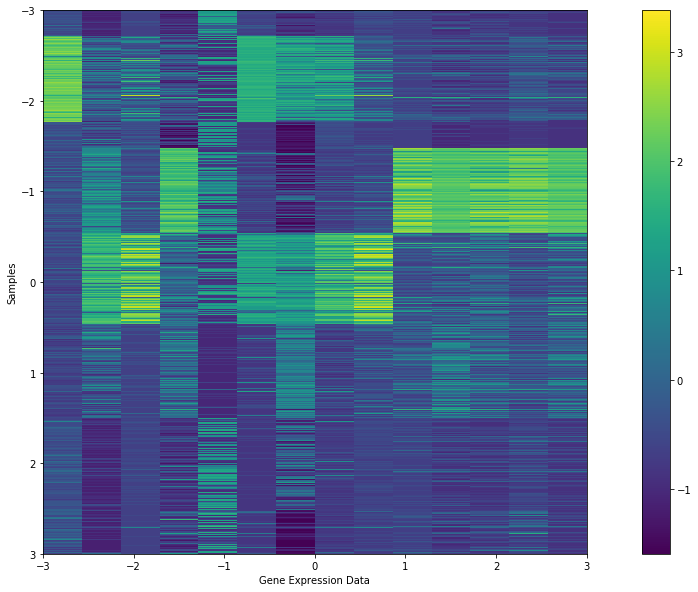

In [5]:
plt.figure(figsize=(20,10))
im = plt.imshow(df, extent=(-3, 3, 3, -3))
plt.ylabel("Samples")
plt.xlabel("Gene Expression Data")
plt.colorbar(im)
plt.show()

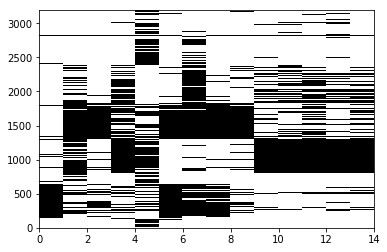

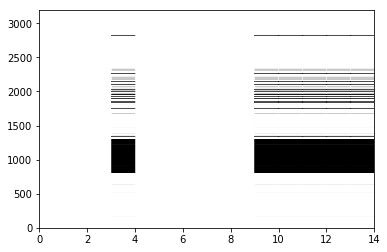

In [4]:
model = BiMax()
df_binary = df > 0
model.fit(df_binary.values)

# get largest bicluster
idx = np.argmax(list(model.rows_[i].sum() * model.columns_[i].sum() for i in range(len(model.rows_))))
bc = np.outer(model.rows_[idx], model.columns_[idx])

# plot data and overlay largest bicluster
plt.pcolor(df_binary.values, cmap=plt.cm.Greys)
plt.show()
plt.pcolor(bc, cmap=plt.cm.Greys, alpha=0.7)
plt.show()

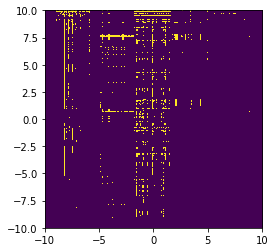

In [11]:
plt.imshow(model.rows_, extent=(-10, 10, -10, 10))
plt.show()

In [7]:
df_binary.shape

(3189, 14)